In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
coursera = pd.read_csv("/content/Coursera.csv")
udemy = pd.read_csv("/content/Udemy.csv")
skillshare = pd.read_csv("/content/skillshare.csv")
edx = pd.read_csv("/content/edx.csv")

In [ ]:
coursera.sample()

,partner,course,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
632,Universiteit Leiden,International Law In Action: Investigating and...,"{""(612 reviews)""}",4.8,612,Mixed,Course,1 - 3 Months,False


In [ ]:
udemy.sample()

,title,description,instructor,rating,reviewcount,duration,lectures,level
16146,Quickbooks Certification Exam - Practice Test ...,"""Excel in QuickBooks Certification Exam: Compr...",Edgardo Lamadrid,4.0,30,80 questions,All Levels,NaN


In [ ]:
skillshare.sample()

,title,link,duration,instructor,students
10487,50 Tips to Improve Your Art,https://www.skillshare.com/en/classes/50-Tips-...,12m,Amaya Jade,566 students


In [ ]:
edx.sample()

,title,link,institution,subject,level,prerequisites,language,videotranscript,associatedprograms,associatedskills
36,Entrepreneurship inEmerging Economies,https://www.edx.org/learn/entrepreneurship/har...,Harvard University,Business & Management,Introductory,NaN,English,English,NaN,"Property Rights, Infrastructure, Value Systems..."


In [ ]:
coursera.sample(5)

,partner,course,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
191,Johns Hopkins University,Data Science: Foundations using R,"{"" Data Analysis"","" R Programming"","" Statistic...",4.6,47.7k,Beginner,Specialization,3 - 6 Months,False
75,Meta,Meta Android Developer,"{"" Mobile Development"","" Computer Programming""...",4.6,5.1k,Beginner,Professional Certificate,3 - 6 Months,False
464,Georgia Institute of Technology,Write Professional Emails in English,"{"" Writing"","" Business Communication"","" Profes...",4.8,16.7k,Mixed,Course,1 - 3 Months,False
964,Stanford University,Evaluations of AI Applications in Healthcare,"{""(174 reviews)""}",4.5,174,Beginner,Course,1 - 3 Months,False
956,University of Virginia,Foundations of Business Strategy,"{"" Entrepreneurship"","" Leadership and Manageme...",4.8,2.9k,Beginner,Course,1 - 4 Weeks,False


In [ ]:
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner            1139 non-null   object 
 1   course             1139 non-null   object 
 2   skills             1088 non-null   object 
 3   rating             993 non-null    float64
 4   reviewcount        993 non-null    object 
 5   level              1004 non-null   object 
 6   certificatetype    1116 non-null   object 
 7   duration           1116 non-null   object 
 8   crediteligibility  1139 non-null   bool   
dtypes: bool(1), float64(1), object(7)
memory usage: 72.4+ KB


In [ ]:
coursera['reviewcount'] = pd.to_numeric(coursera['reviewcount'].str.replace('k', 'e3').str.replace('B', 'e9'), errors='coerce')

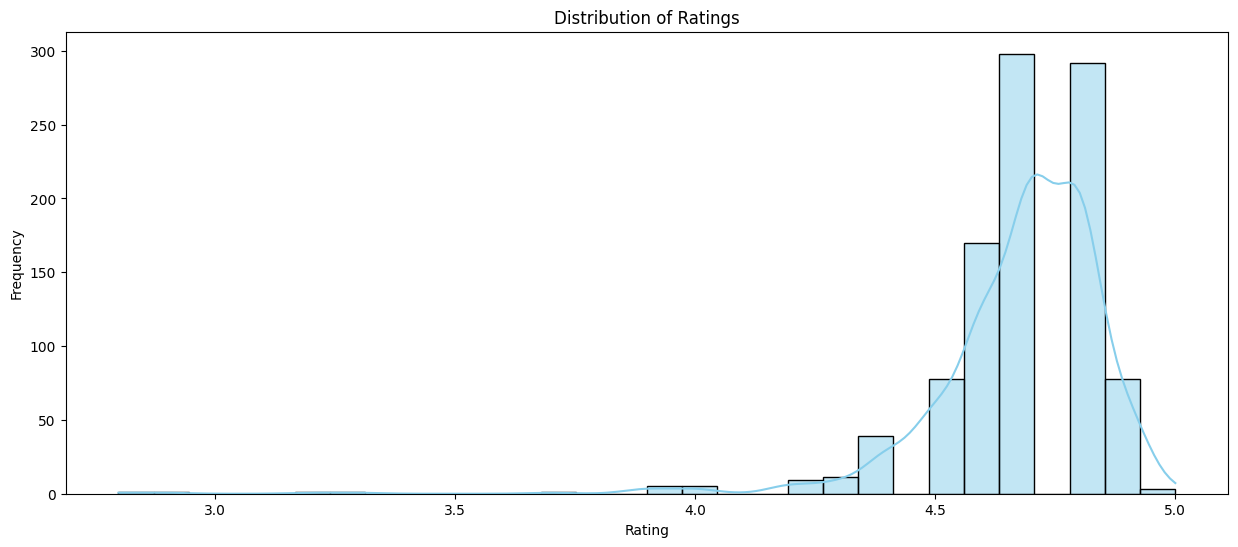

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(coursera['rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-12-b8d6ad8e14d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='level', data=coursera, order=coursera['level'].value_counts().index, palette='viridis')


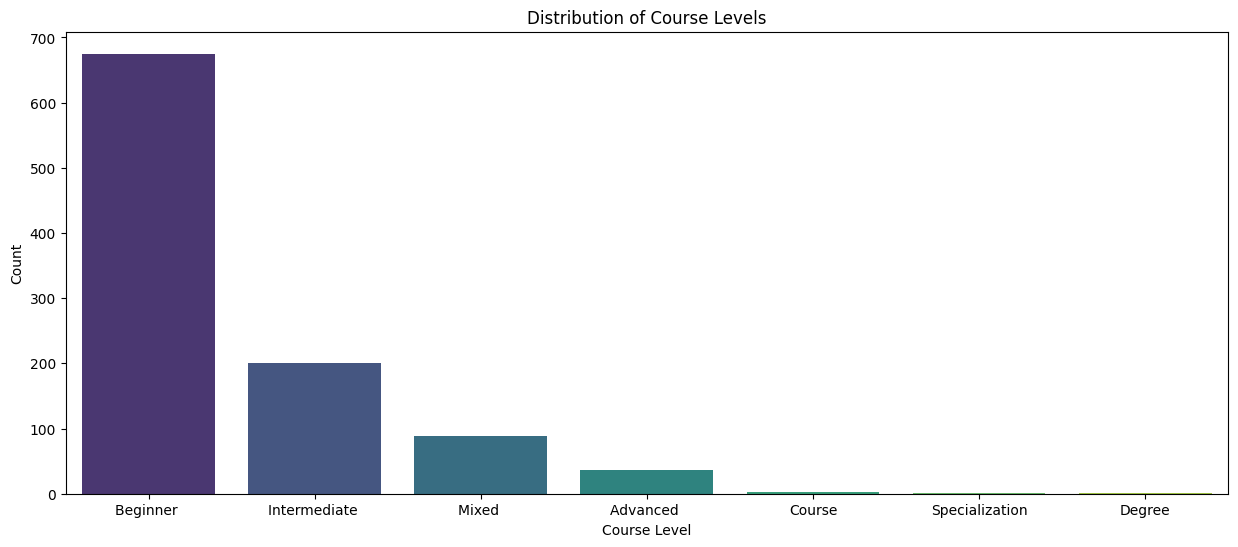

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='level', data=coursera, order=coursera['level'].value_counts().index, palette='viridis')
plt.title('Distribution of Course Levels')
plt.xlabel('Course Level')
plt.ylabel('Count')
plt.show()

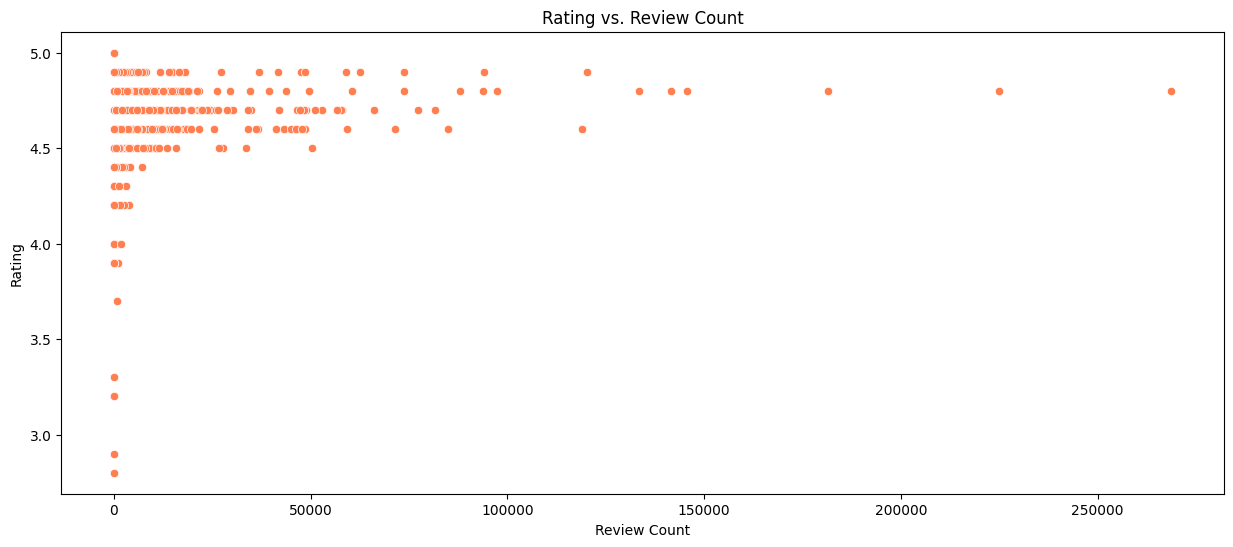

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='reviewcount', y='rating', data=coursera, color='coral')
plt.title('Rating vs. Review Count')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

<ipython-input-14-dfc7173d35f7>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rating', y='partner', data=top_partner_data, palette='muted', ci=None)
<ipython-input-14-dfc7173d35f7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='partner', data=top_partner_data, palette='muted', ci=None)


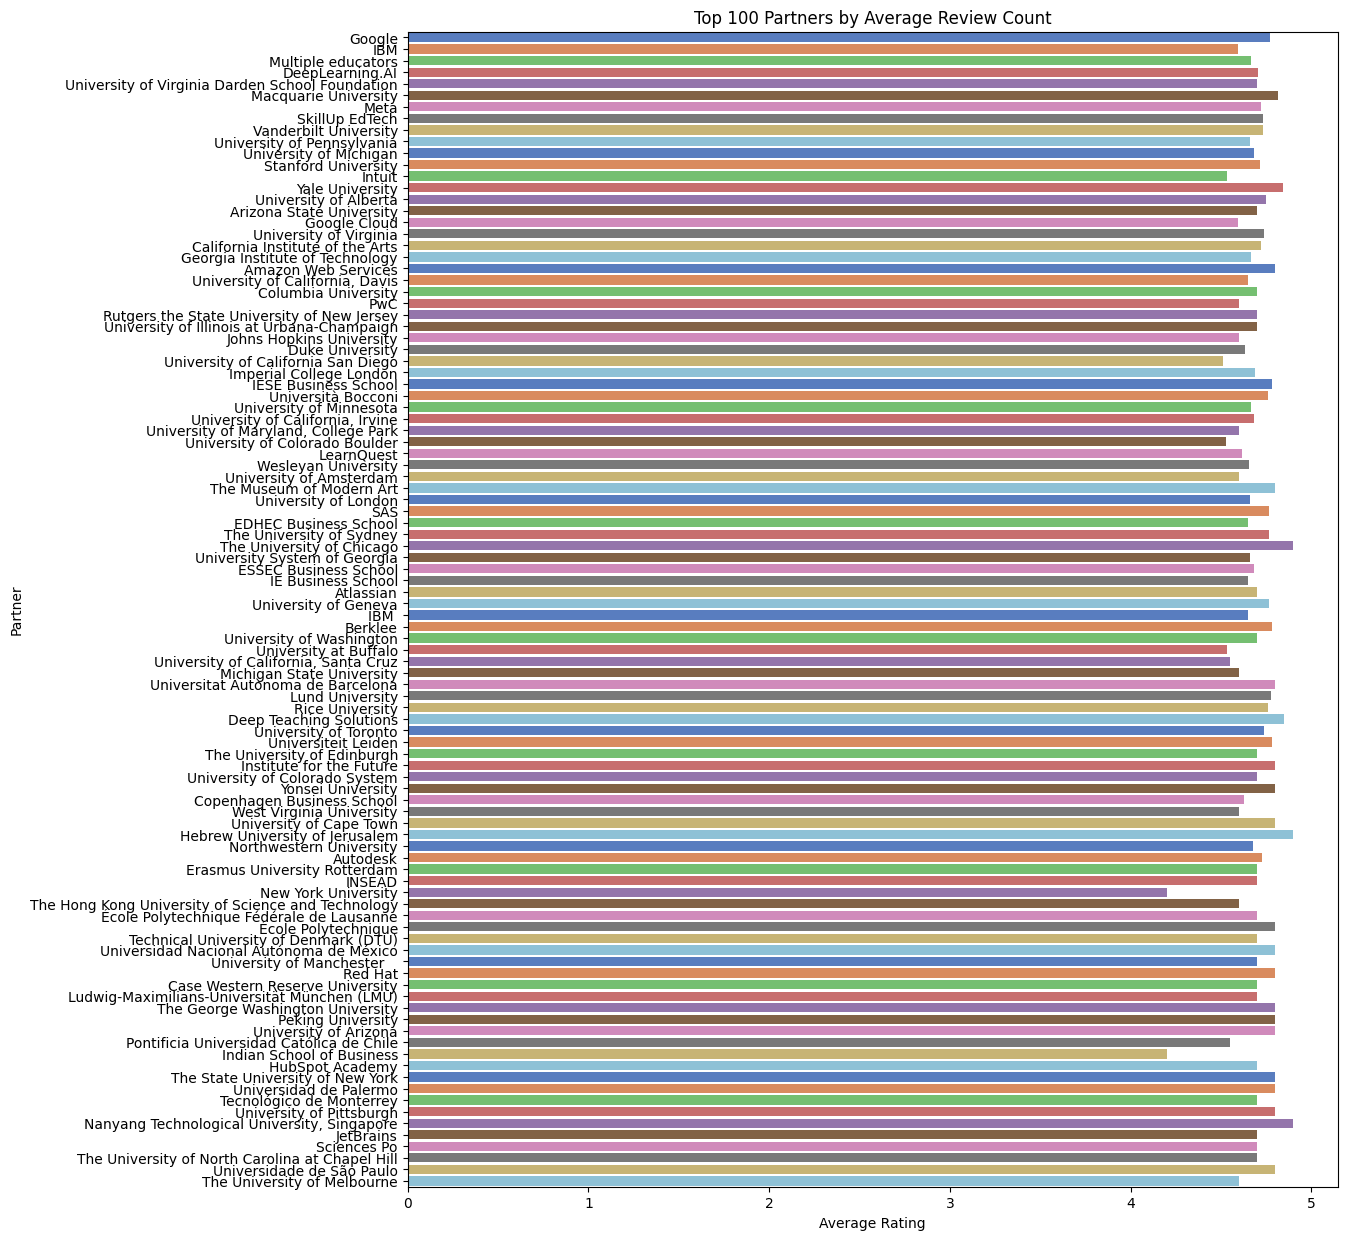

In [ ]:
# Show only the top N partners with the highest average ratings
top_n = 100
top_partners = coursera.groupby('partner')['reviewcount'].mean().sort_values(ascending=False).head(top_n).index

# Filter the DataFrame to include only the top partners
top_partner_data = coursera[coursera['partner'].isin(top_partners)]

# Partner Performance - Horizontal Bar Plot
plt.figure(figsize=(12, 15))
sns.barplot(x='rating', y='partner', data=top_partner_data, palette='muted', ci=None)
plt.title(f'Top {top_n} Partners by Average Review Count')
plt.xlabel('Average Rating')
plt.ylabel('Partner')
plt.show()

<ipython-input-15-7f01e03a4b6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='certificatetype', data=coursera, order=coursera['certificatetype'].value_counts().index, palette='pastel')


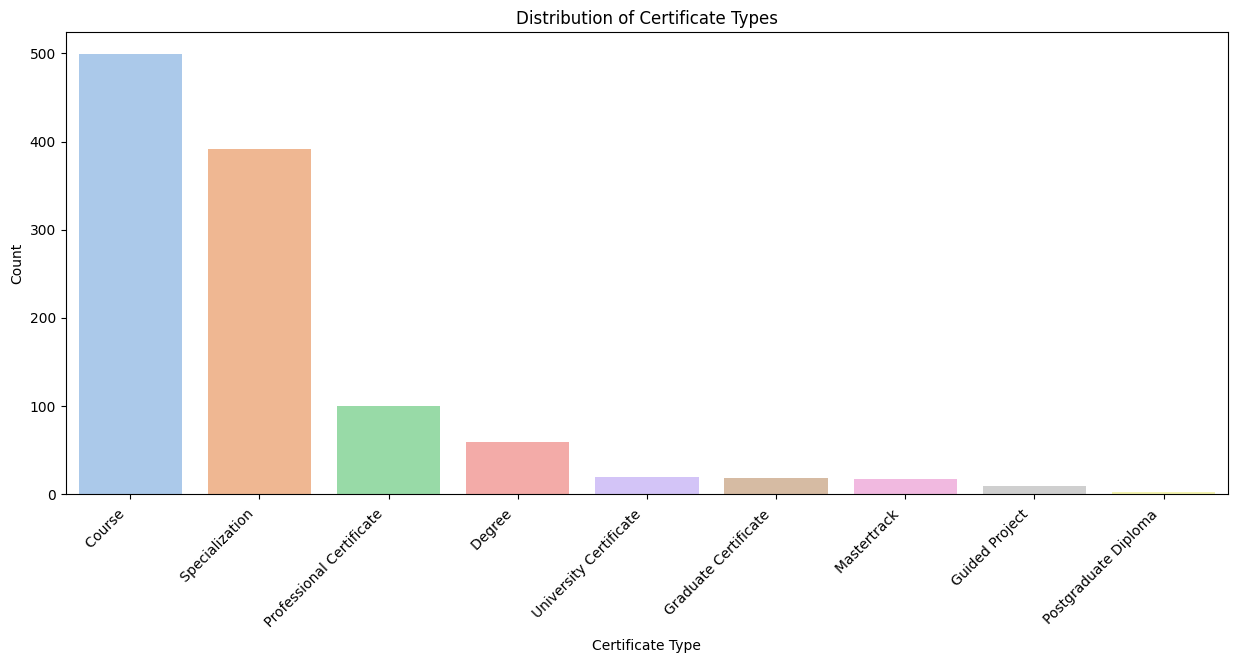

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='certificatetype', data=coursera, order=coursera['certificatetype'].value_counts().index, palette='pastel')
plt.title('Distribution of Certificate Types')
plt.xlabel('Certificate Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-16-063bdfbba9fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='duration', y='rating', data=coursera, palette='Set3')


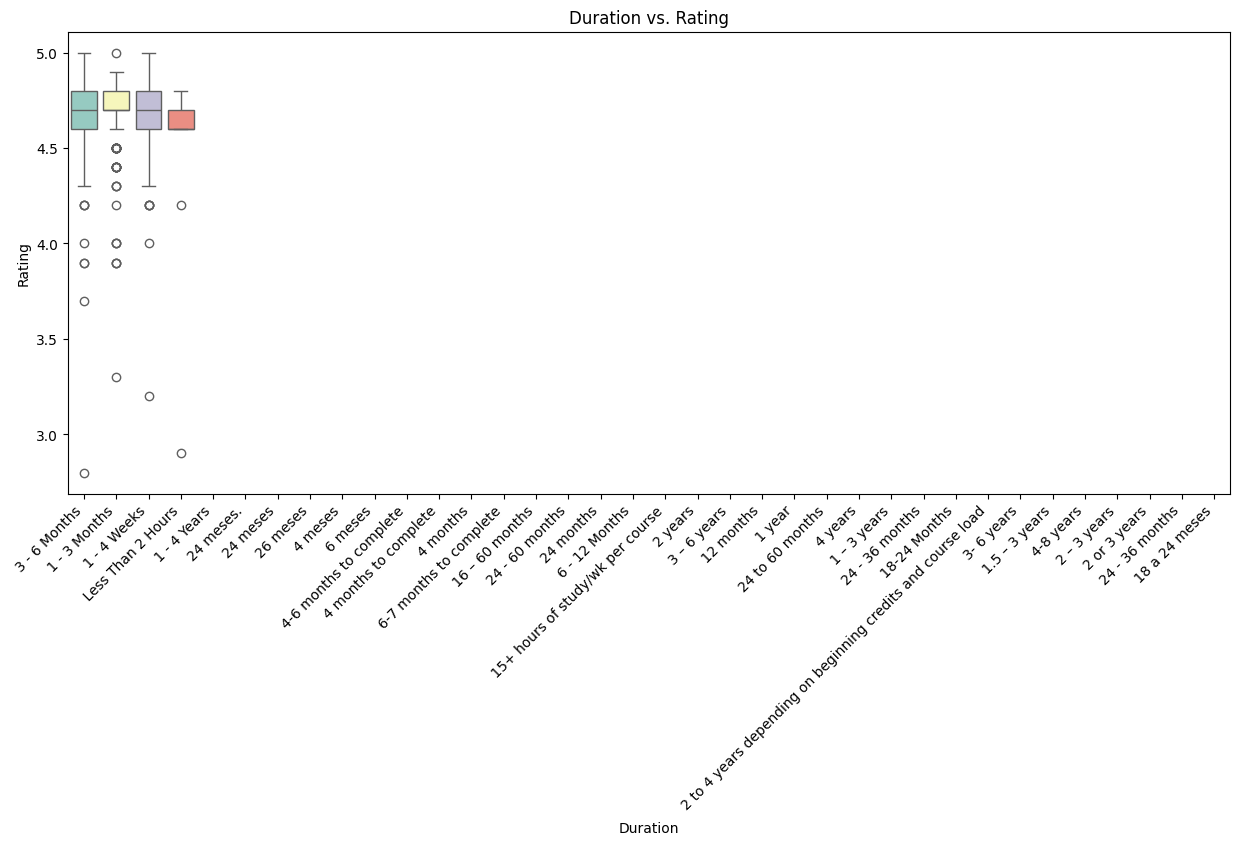

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='duration', y='rating', data=coursera, palette='Set3')
plt.title('Duration vs. Rating')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-17-dc1e853a8cd7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Skill', data=skills_counts.head(top_n_skills), palette='viridis')


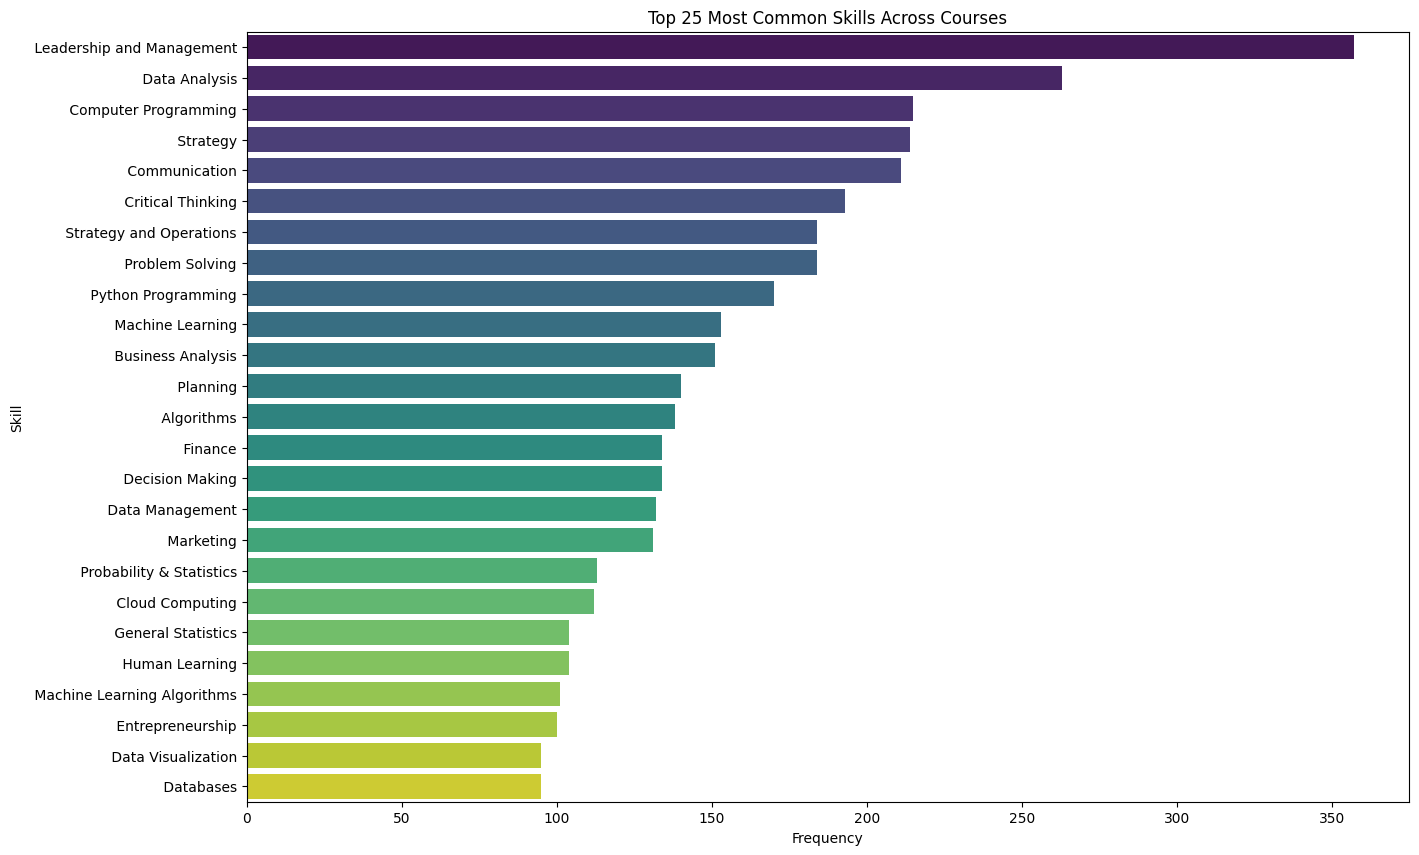

In [ ]:


# Check for missing values in the 'skills' column
coursera['skills'] = coursera['skills'].apply(lambda x: [skill.strip('"{}') for skill in str(x).split('","')] if pd.notnull(x) else [])

# Flatten the list of skills
all_skills = [skill for skills_list in coursera['skills'] for skill in skills_list]

# Create a DataFrame for skills and their frequencies
skills_df = pd.DataFrame(all_skills, columns=['Skill'])
skills_counts = skills_df['Skill'].value_counts().reset_index()
skills_counts.columns = ['Skill', 'Frequency']

# Plot the top N skills
top_n_skills = 25
plt.figure(figsize=(15, 10))
sns.barplot(x='Frequency', y='Skill', data=skills_counts.head(top_n_skills), palette='viridis')
plt.title(f'Top {top_n_skills} Most Common Skills Across Courses')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()


In [ ]:
skills_counts

,Skill,Frequency
0,Leadership and Management,357
1,Data Analysis,263
2,Computer Programming,215
3,Strategy,214
4,Communication,211
...,...,...
427,(70 reviews),1
428,(4.5k reviews),1
429,(461 reviews),1
430,(7.1k reviews),1


In [ ]:
coursera["reviewcount"].mean()

7827.922457200403

In [ ]:
udemy['duration_hours'] = pd.to_numeric(udemy['duration'].str.replace(' total hours', ''), errors='coerce')

# Handle missing values in 'level' column
udemy['level'] = udemy['level'].fillna('Not Specified')

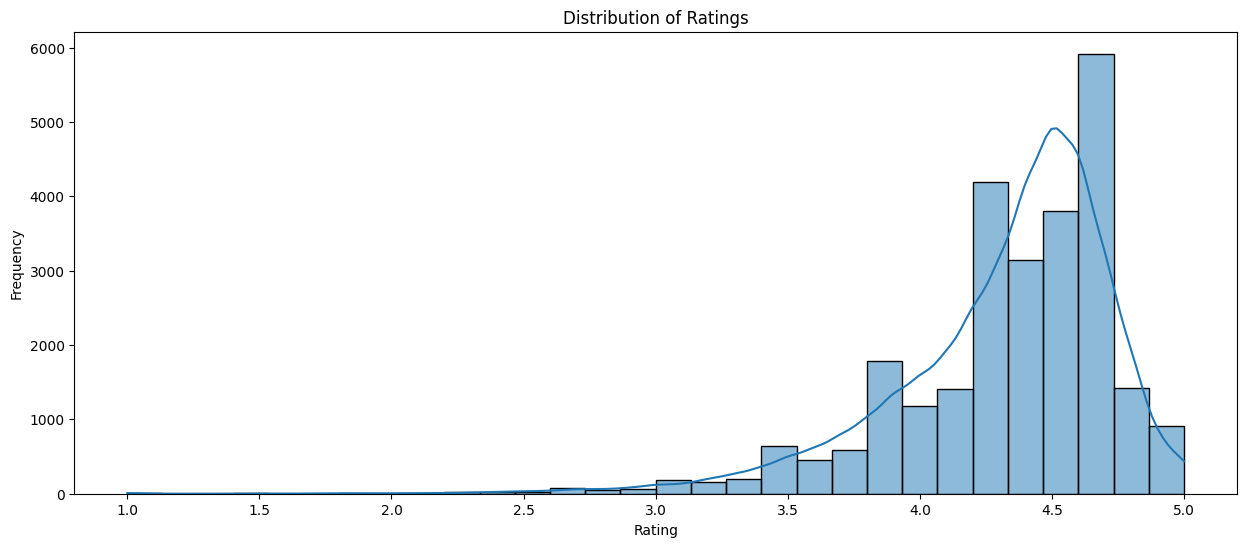

In [ ]:
# Distribution of Ratings
plt.figure(figsize=(15, 6))
sns.histplot(udemy['rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

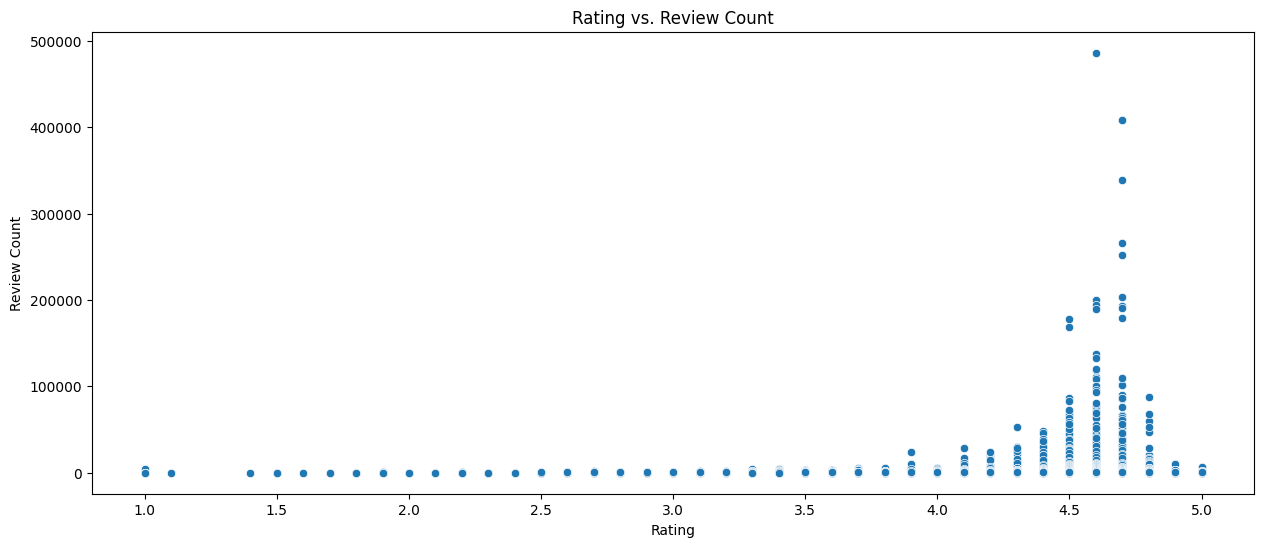

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='rating', y='reviewcount', data=udemy)
plt.title('Rating vs. Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.show()

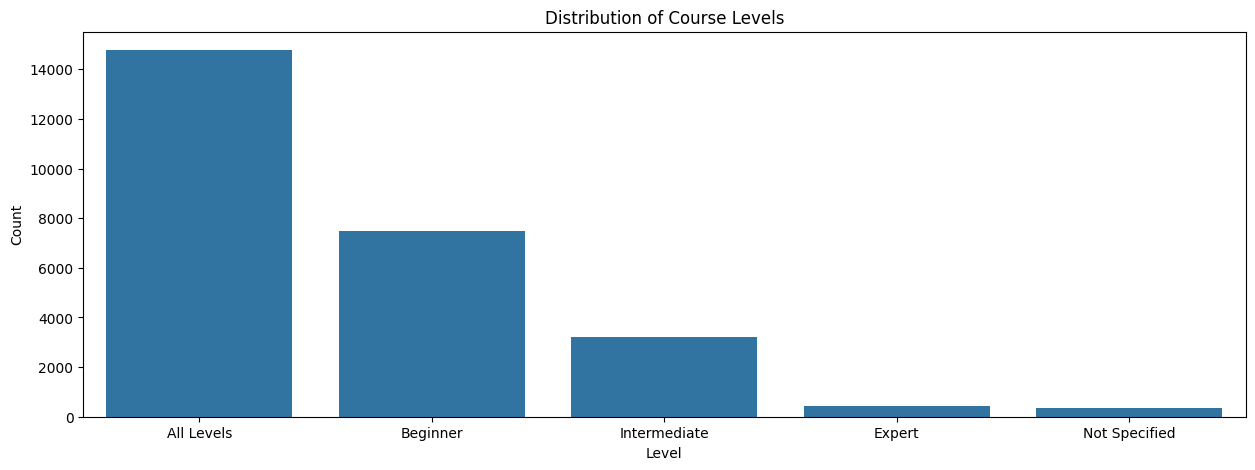

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='level', data=udemy, order=udemy['level'].value_counts().index)
plt.title('Distribution of Course Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

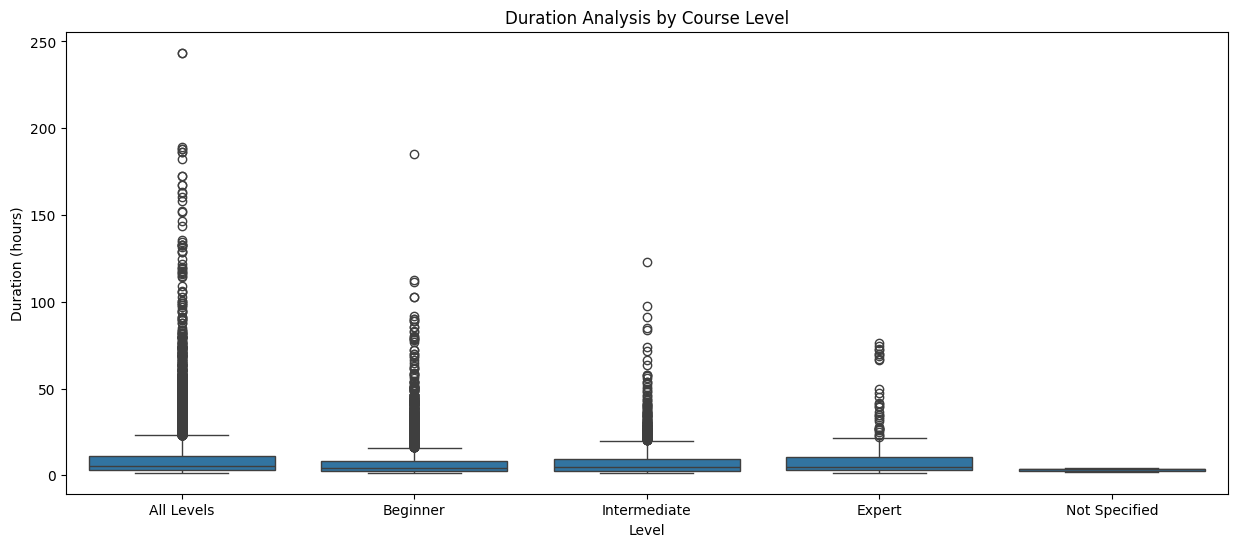

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='level', y='duration_hours', data=udemy)
plt.title('Duration Analysis by Course Level')
plt.xlabel('Level')
plt.ylabel('Duration (hours)')
plt.show()

<ipython-input-25-445f9b157199>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_instructors.index, y=top_instructors.values, palette='viridis')


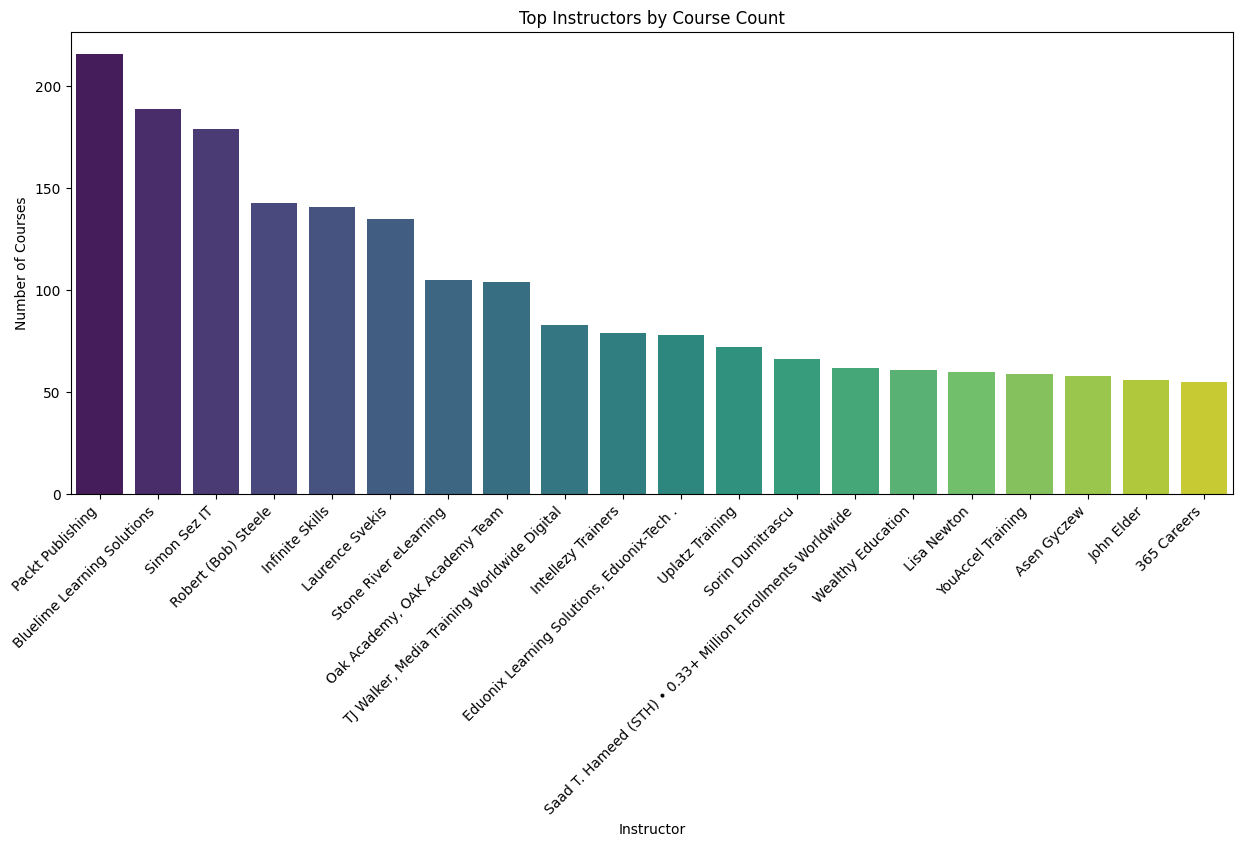

In [ ]:
top_instructors = udemy['instructor'].value_counts().head(20)

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=top_instructors.index, y=top_instructors.values, palette='viridis')
plt.title('Top Instructors by Course Count')
plt.xlabel('Instructor')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
udemy["reviewcount"].mean()

1549.3408744667886

In [ ]:
skillshare['students'] = skillshare['students'].str.extract('(\d+)').astype(float)

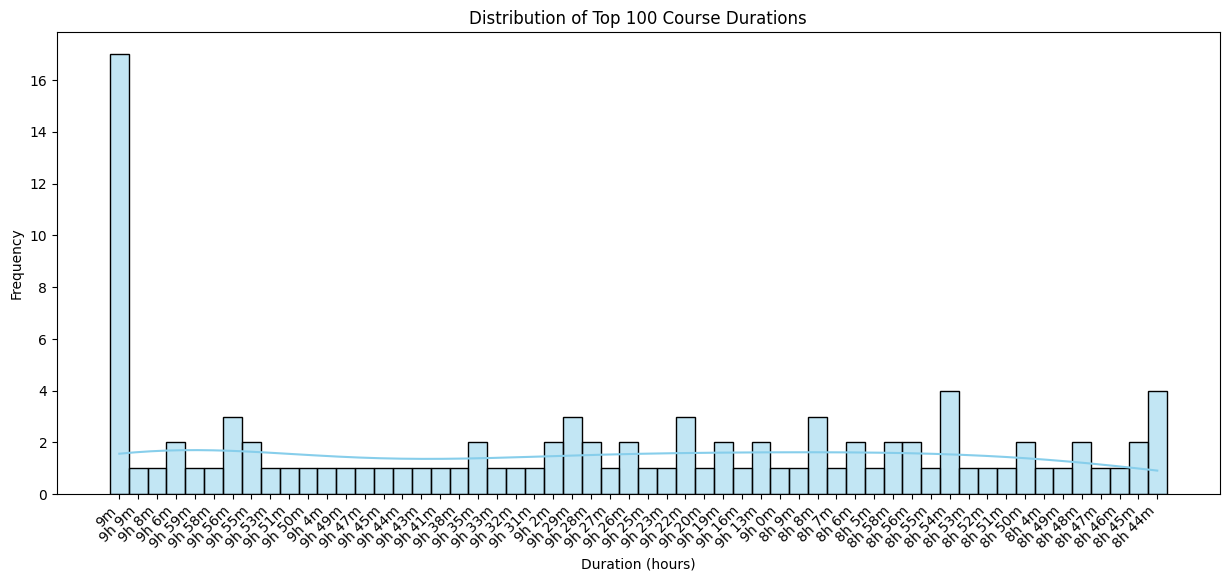

In [ ]:
top_duration_courses = skillshare.sort_values(by='duration', ascending=False).head(100)

# EDA on Top 100 Duration
plt.figure(figsize=(15, 6))
sns.histplot(top_duration_courses['duration'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Top 100 Course Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-29-fafc998244a0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='students', y='title', data=top_students_courses, palette='muted')


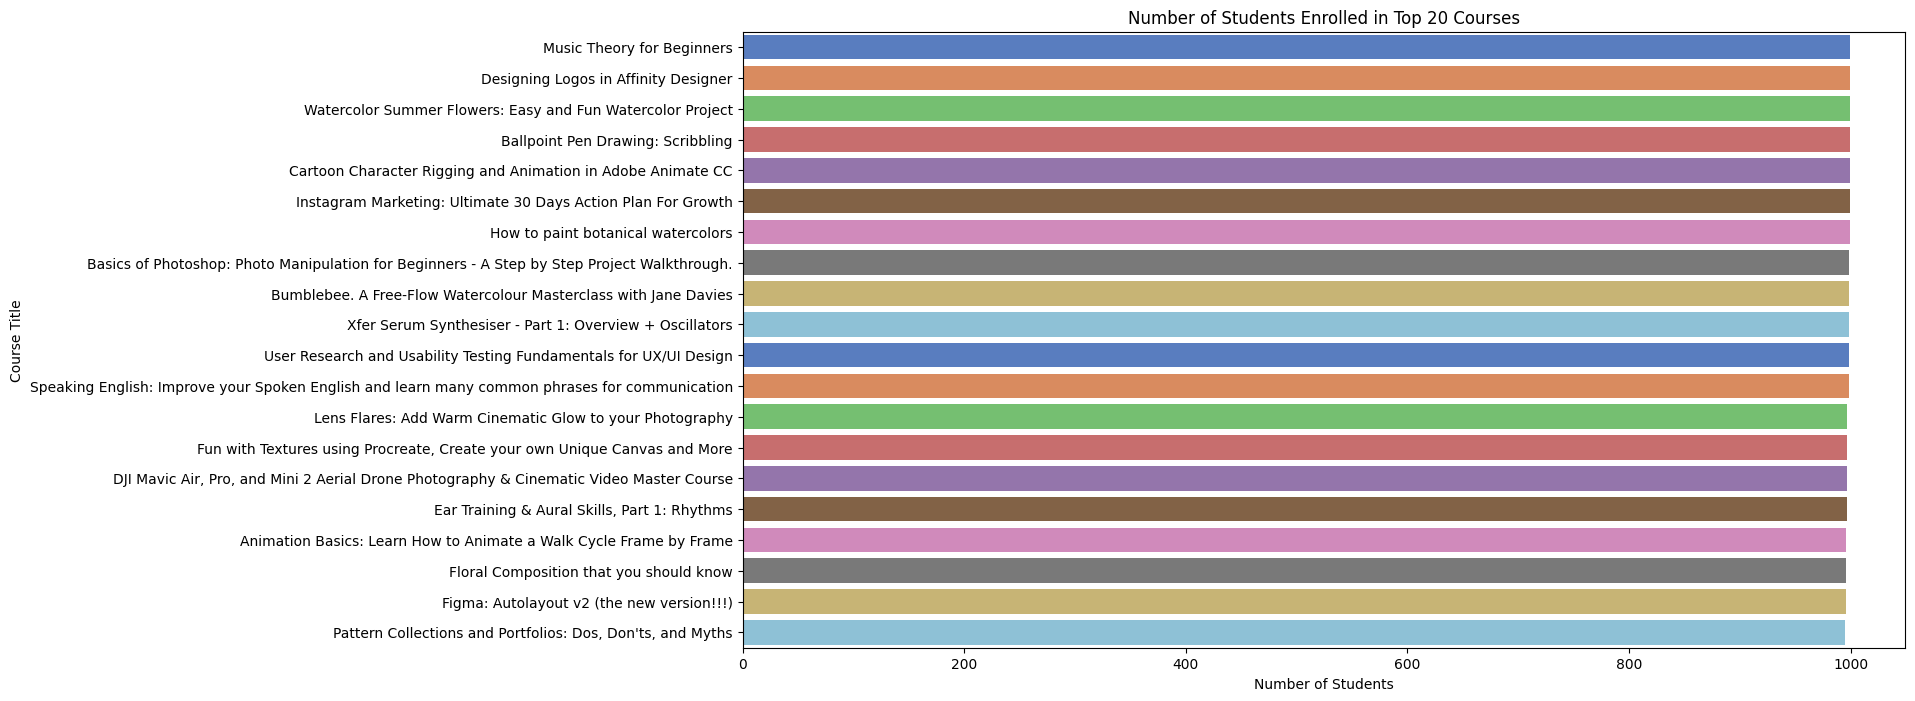

In [ ]:
top_students_courses = skillshare.sort_values(by='students', ascending=False).head(20)

# Bar plot for Number of Students Enrolled in top 20 courses
plt.figure(figsize=(15, 8))
sns.barplot(x='students', y='title', data=top_students_courses, palette='muted')
plt.title('Number of Students Enrolled in Top 20 Courses')
plt.xlabel('Number of Students')
plt.ylabel('Course Title')
plt.show()

<ipython-input-30-c47062ca78c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='institution', data=edx.head(50), palette='muted')


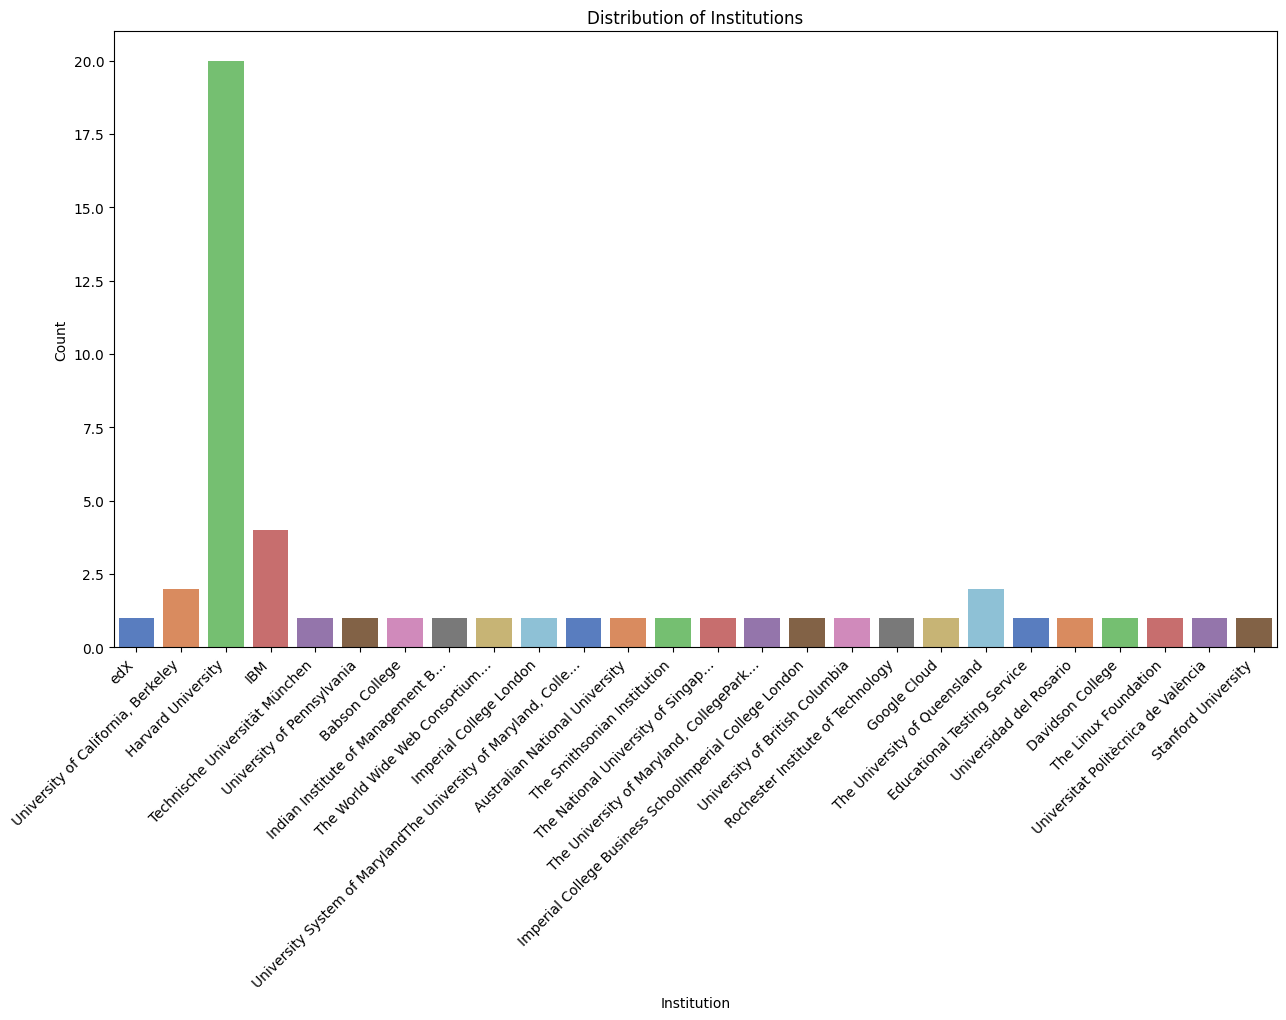

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='institution', data=edx.head(50), palette='muted')
plt.title('Distribution of Institutions')
plt.xlabel('Institution')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-31-4e29afe5105d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=edx, palette='muted')


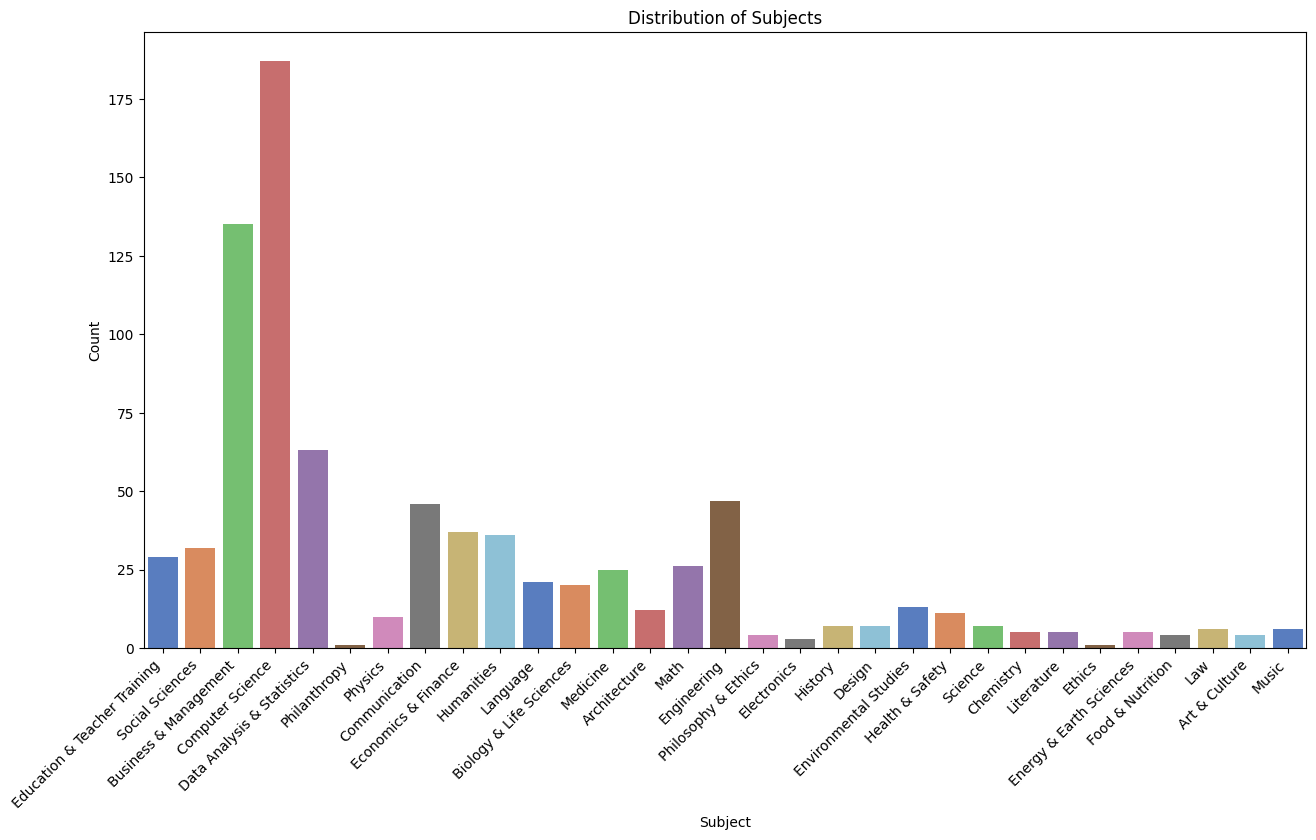

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='subject', data=edx, palette='muted')
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-32-0a452b2cbcb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='level', data=edx, palette='pastel')


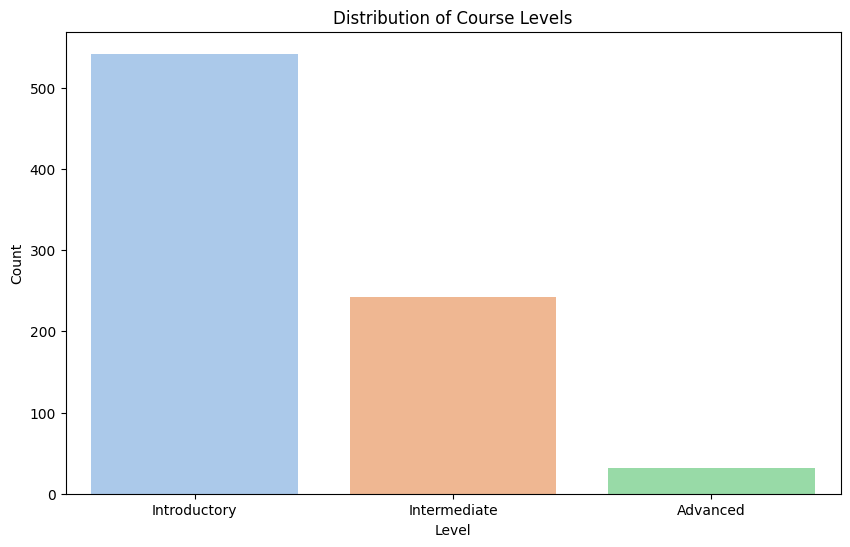

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='level', data=edx, palette='pastel')
plt.title('Distribution of Course Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

<ipython-input-33-cafa78bfd2f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language', data=edx, palette='dark')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


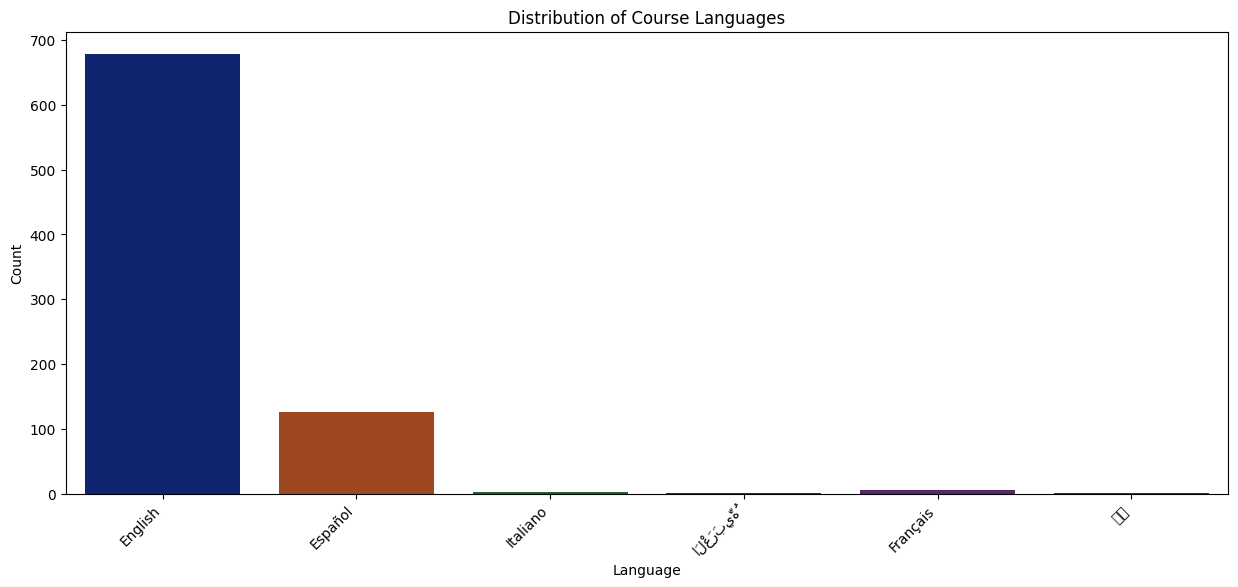

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='language', data=edx, palette='dark')
plt.title('Distribution of Course Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-34-9661bf4b0a18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='videotranscript', data=edx, palette='bright')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


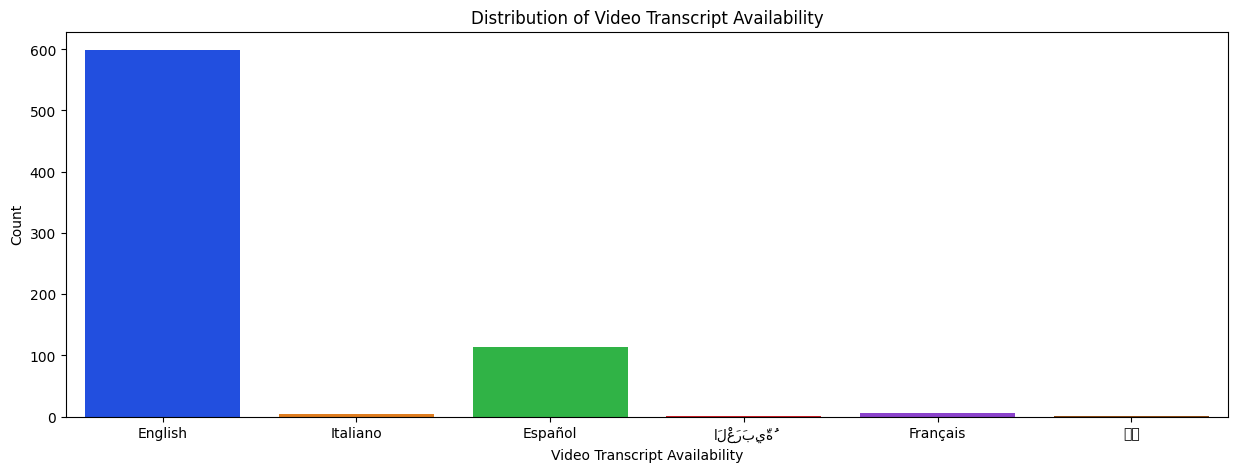

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='videotranscript', data=edx, palette='bright')
plt.title('Distribution of Video Transcript Availability')
plt.xlabel('Video Transcript Availability')
plt.ylabel('Count')
plt.show()

<ipython-input-35-cf1c42f9fa5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_skills[:50], palette='muted')


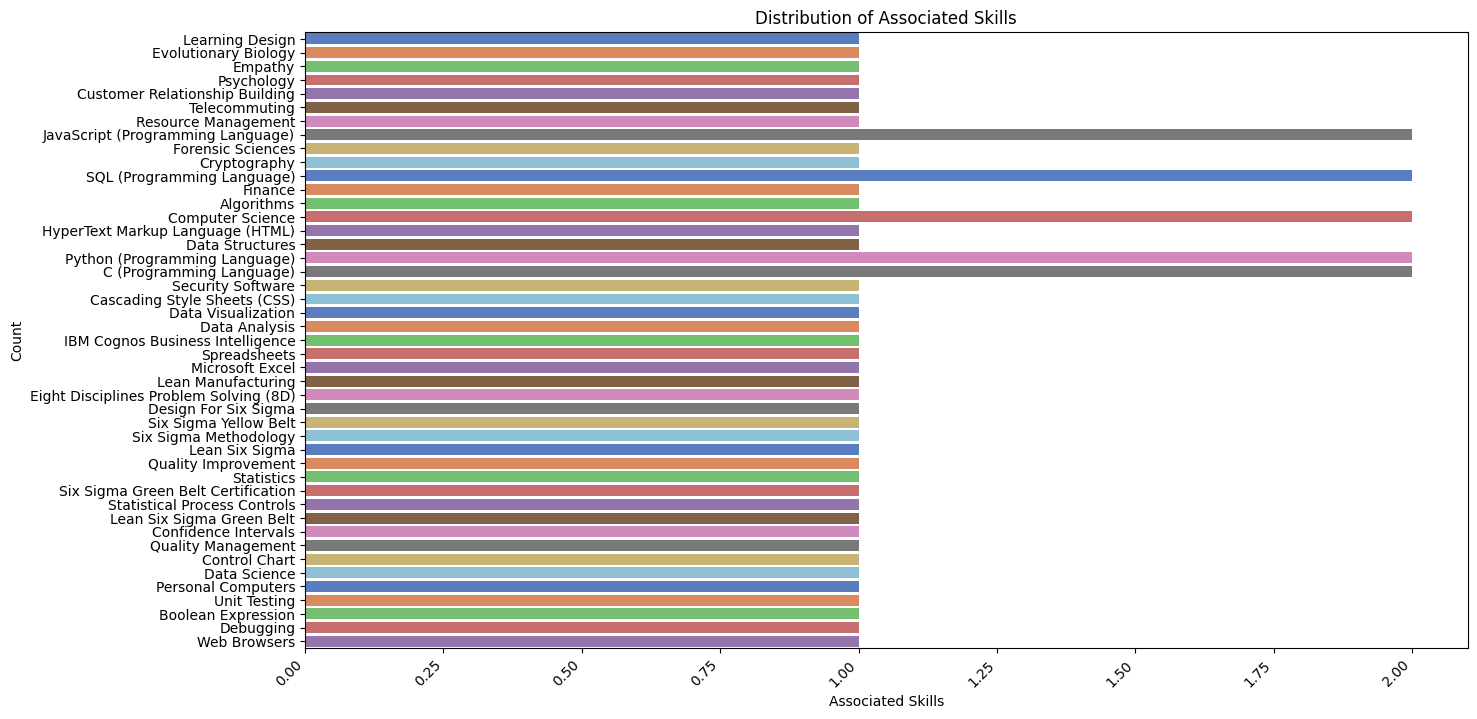

In [ ]:
skills_list = [skills.split(', ') if pd.notnull(skills) else [] for skills in edx['associatedskills']]

# Flatten the list of skills
all_skills = [skill for skills_list in skills_list for skill in skills_list]

# Plot the Distribution of Associated Skills
plt.figure(figsize=(15, 8))
sns.countplot(y=all_skills[:50], palette='muted')
plt.title('Distribution of Associated Skills')
plt.xlabel('Associated Skills')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [20]:
data = pd.read_csv("/content/Coursera.csv")  # Replace with actual dataset file

In [21]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ['level', 'certificatetype', 'crediteligibility']
categorical_encoded = encoder.fit_transform(data[categorical_cols])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

In [23]:
data['duration'] = data['duration'].str.extract(r'(\d+)').astype(float)

In [26]:
data['reviewcount'] = data['reviewcount'].str.replace('k', '', regex=True).astype(float) * 1000

In [24]:
data['duration'].fillna(data['duration'].median(), inplace=True)

<ipython-input-24-b22b581b24c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['duration'].fillna(data['duration'].median(), inplace=True)


In [27]:
data['reviewcount'].fillna(data['reviewcount'].median(), inplace=True)

<ipython-input-27-a64dd168206d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviewcount'].fillna(data['reviewcount'].median(), inplace=True)


In [28]:
scaler = StandardScaler()
numerical_cols = ['rating', 'reviewcount', 'duration']
scaled_numerical = scaler.fit_transform(data[numerical_cols])
numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_cols)

In [29]:
processed_data = pd.concat([numerical_df, categorical_df], axis=1)

In [30]:
for col in processed_data.columns:
    if processed_data[col].dtype in [np.float64, np.int64]:  # Numerical column
        processed_data[col] = processed_data[col].fillna(processed_data[col].mean())  # Fill NaNs with mean
    else:  # Categorical column
        processed_data[col] = processed_data[col].fillna(processed_data[col].mode()[0])  # Fill NaNs with mode

# Specifically address potential NaNs in 'duration' after concatenation
processed_data['duration'] = processed_data['duration'].fillna(processed_data['duration'].mean())

# Now apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(processed_data)

In [31]:
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(processed_data)
data['DBSCAN_Cluster'] = dbscan_labels

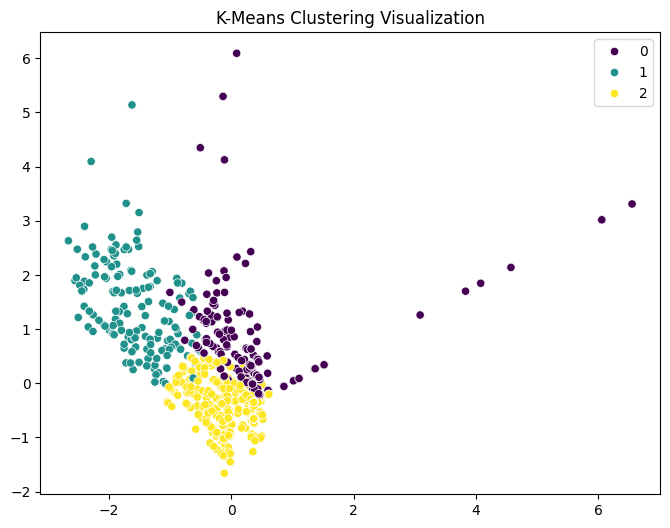

In [32]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(processed_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clustering Visualization")
plt.show()

In [33]:
data['High_Success'] = (data['rating'] >= 4.5) & (data['reviewcount'] >= 50000)
X = processed_data
y = data['High_Success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       164
        True       1.00      1.00      1.00        64

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [35]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9078947368421053
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       164
        True       0.88      0.78      0.83        64

    accuracy                           0.91       228
   macro avg       0.90      0.87      0.88       228
weighted avg       0.91      0.91      0.91       228

